# Census Income Project

**Problem Statement:**


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

#### The prediction task is to determine whether a person makes over $50K a year.

### Importing Libraries

In [555]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from matplotlib.cm import rainbow
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import warnings 
warnings.filterwarnings('ignore')

In [441]:
cdf = pd.read_csv('Census1.txt' , sep = ',' )

Changing columns name 

In [442]:
cdf.columns = columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Number', 'Marital_Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Country', 'Income']

In [443]:
cdf

,Age,Work_Class,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [444]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32560 non-null  int64 
 1   Work_Class        32560 non-null  object
 2   Final_Weight      32560 non-null  int64 
 3   Education         32560 non-null  object
 4   Education_Number  32560 non-null  int64 
 5   Marital_Status    32560 non-null  object
 6   Occupation        32560 non-null  object
 7   Relationship      32560 non-null  object
 8   Race              32560 non-null  object
 9   Sex               32560 non-null  object
 10  Capital_Gain      32560 non-null  int64 
 11  Capital_Loss      32560 non-null  int64 
 12  Hours_per_Week    32560 non-null  int64 
 13  Country           32560 non-null  object
 14  Income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [445]:
cdf['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

From above target variable we can observe that this is purely a classification problem.

### Exploratory Data Analysis (EDA)

In [447]:
cdf.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education_Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_Week      0
Country             0
Income              0
dtype: int64

In [448]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32560 non-null  int64 
 1   Work_Class        32560 non-null  object
 2   Final_Weight      32560 non-null  int64 
 3   Education         32560 non-null  object
 4   Education_Number  32560 non-null  int64 
 5   Marital_Status    32560 non-null  object
 6   Occupation        32560 non-null  object
 7   Relationship      32560 non-null  object
 8   Race              32560 non-null  object
 9   Sex               32560 non-null  object
 10  Capital_Gain      32560 non-null  int64 
 11  Capital_Loss      32560 non-null  int64 
 12  Hours_per_Week    32560 non-null  int64 
 13  Country           32560 non-null  object
 14  Income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [449]:
int_type = [feature for feature in cdf.columns if cdf[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['Age', 'Final_Weight', 'Education_Number', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week']
Number of columns with integer data type in adf is : 6


In [450]:
object_type = [feature for feature in cdf.columns if cdf[feature].dtypes =='O']
print(object_type)
print("Number of columns with integer data type in adf is :" , len(object_type))


['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Income']
Number of columns with integer data type in adf is : 9


In [ ]:
Integer_type = ['Age', 'Final_Weight', 'Education_Number', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week']

In [451]:
categorical_type = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

**Age**


Here, we'll group the age into separate bins.

0-25: Young<br>
25-50: Adult<br>
50-100: Old<br>

In [452]:
cdf['Age'] = pd.cut(cdf['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

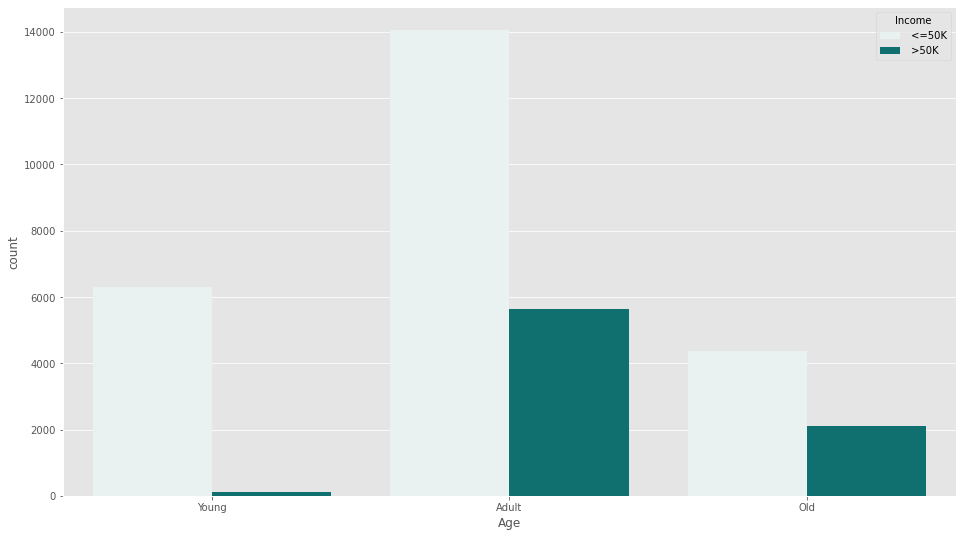

In [453]:
plt.figure(figsize = (16,9))
sns.countplot(x = 'Age', hue = 'Income', data = cdf , color = 'teal' )

From above we can observe that:<br>
-Most of the Young people (ages between 0-25)  has income less than or equal to 50K.<br>
-Adults has higher percentages of getting an income less than or equal to 50K as compared to Young people and has higher amount of people getting an income greater than 50k.<br>
-Old people has almost 50 - 50% people gettting salary less than or equal to 50k and getting an income greater than $50k.

**Work Class**

In [454]:
cdf['Work_Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64

In [455]:
cdf['Work_Class'] = cdf['Work_Class'].astype(object)

In [456]:
cdf['Work_Class'].replace(' ?' , ' Private' , inplace = True)

In [457]:
cdf['Work_Class'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64

In [458]:
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Without-pay'].index)
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Never-worked'].index)

<AxesSubplot:xlabel='Work_Class', ylabel='count'>

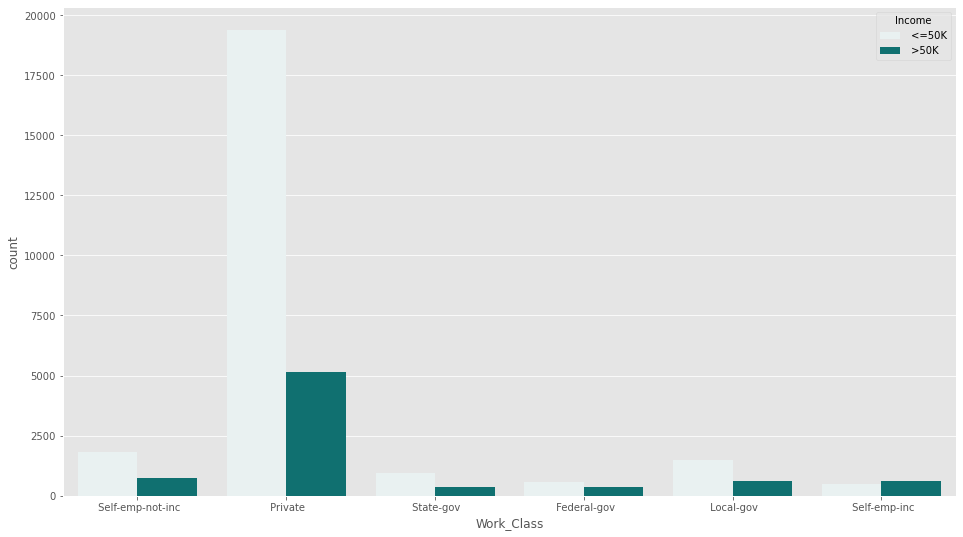

In [459]:
plt.figure(figsize= (16,9))
sns.countplot(x = 'Work_Class', hue = 'Income', data = cdf , color = 'teal')

**Final Weight**<br>

In [460]:
cdf['Final_Weight'].value_counts()

123011    13
164190    13
203488    13
121124    12
148995    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: Final_Weight, Length: 21634, dtype: int64

**Education and Education Number**<br>

It's a good time to check if there is any relation between Education and Education Number.

In [461]:
education_classes = cdf['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, cdf[cdf['Education'] == edu_class]['Education_Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


From the analysis above, We have discovered that Education Number and Education are just the same. So, we can drop any one column.<br> Also, we'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.


In [462]:
cdf.drop(['Education_Number'], axis = 1, inplace = True)
cdf['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
cdf['Education'].value_counts()


 HS-grad         10491
 Some-college     7286
 Bachelors        5354
 School           4248
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1066
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

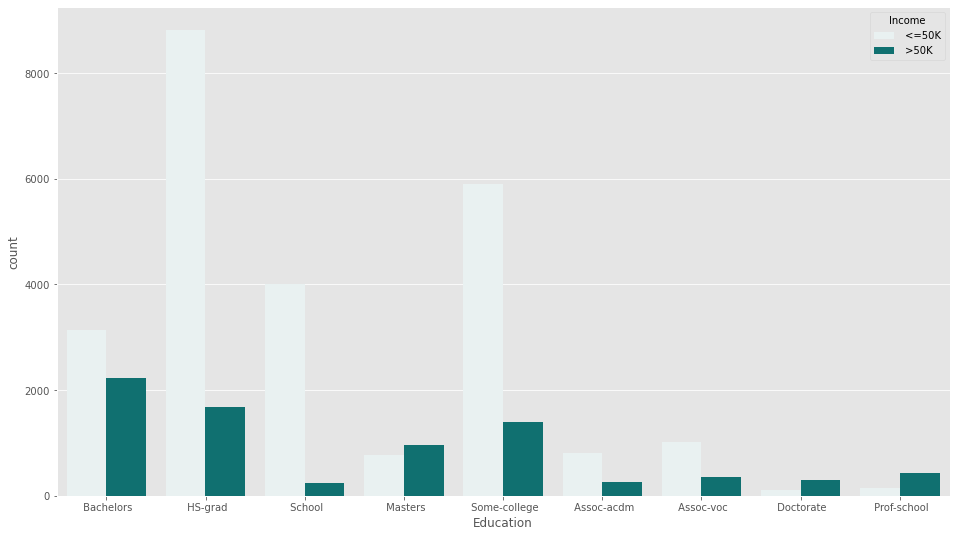

In [463]:
plt.figure(figsize = (16,9))
sns.countplot(x = 'Education', hue = 'Income', data = cdf , color = 'teal')

**Marital Status**

In [464]:
cdf['Marital_Status'].value_counts()

 Married-civ-spouse       14967
 Never-married            10673
 Divorced                  4442
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      417
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

**Relationship**

In [465]:
cdf['Relationship'].value_counts()

 Husband           13189
 Not-in-family      8303
 Own-child          5058
 Unmarried          3444
 Wife               1564
 Other-relative      981
Name: Relationship, dtype: int64

**Occupation**

In [466]:
cdf['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 ?                    1836
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In here we can observe that there are values with '?' so we'll replace it by the value with max number (i.e Prof-specialty )

In [467]:
cdf['Occupation'].replace(' ?' , 'Prof-specialty'  , inplace = True)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

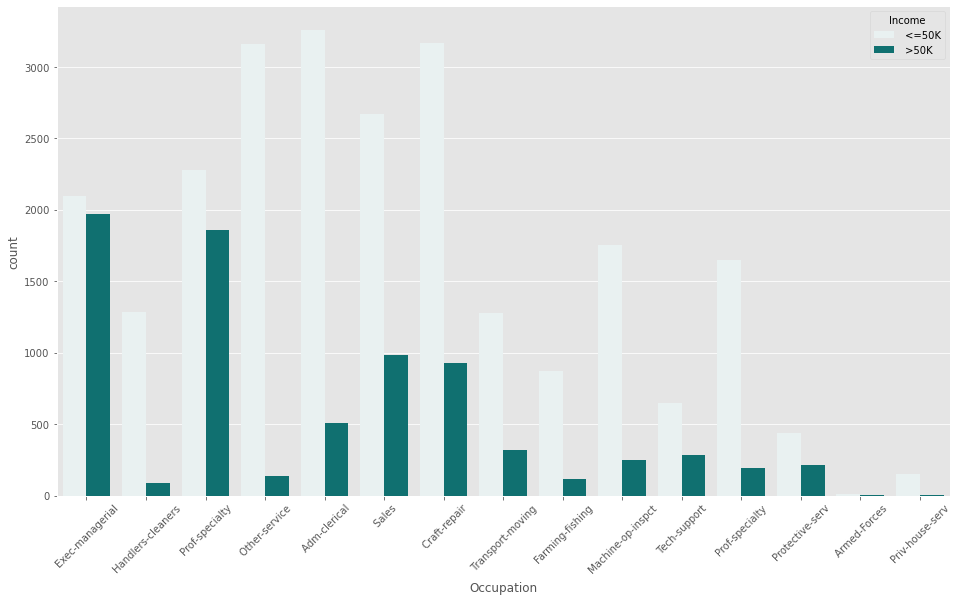

In [468]:
plt.figure(figsize=(16,9))
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = cdf , color = 'teal')

**Race**

In [469]:
cdf['Race'].value_counts()

 White                 27798
 Black                  3121
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In here we'll just group all the datas as White or Black .

In [470]:
cdf['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Black', inplace = True)

<AxesSubplot:xlabel='Race', ylabel='count'>

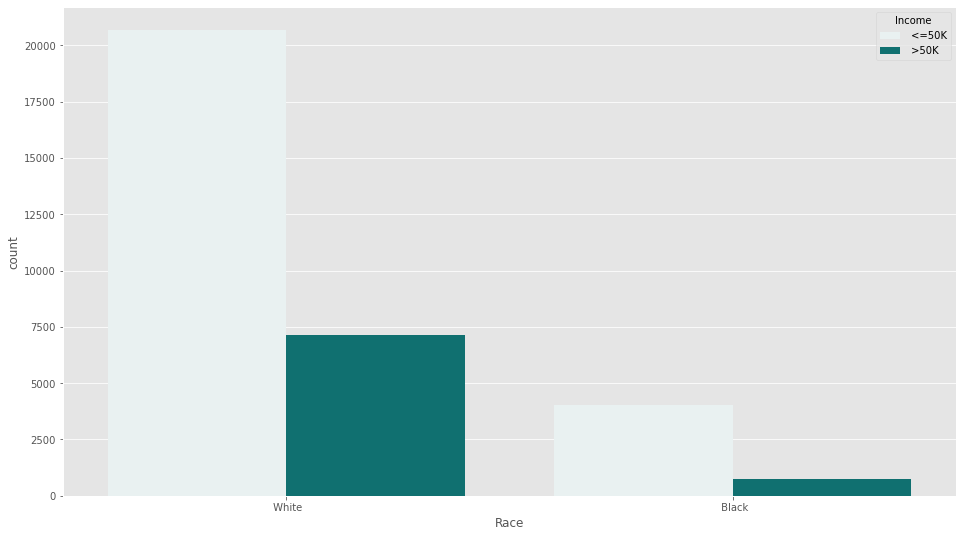

In [471]:
plt.figure(figsize = (16,9))
sns.countplot(x = 'Race', hue = 'Income', data = cdf , color = 'teal')

From above we can observe that from both the datas White and Black , Whites has more people gaining an income of less than or equal than 50K and greater than 50k.

**Sex**

In [472]:
cdf['Sex'].value_counts()

 Male      21775
 Female    10764
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

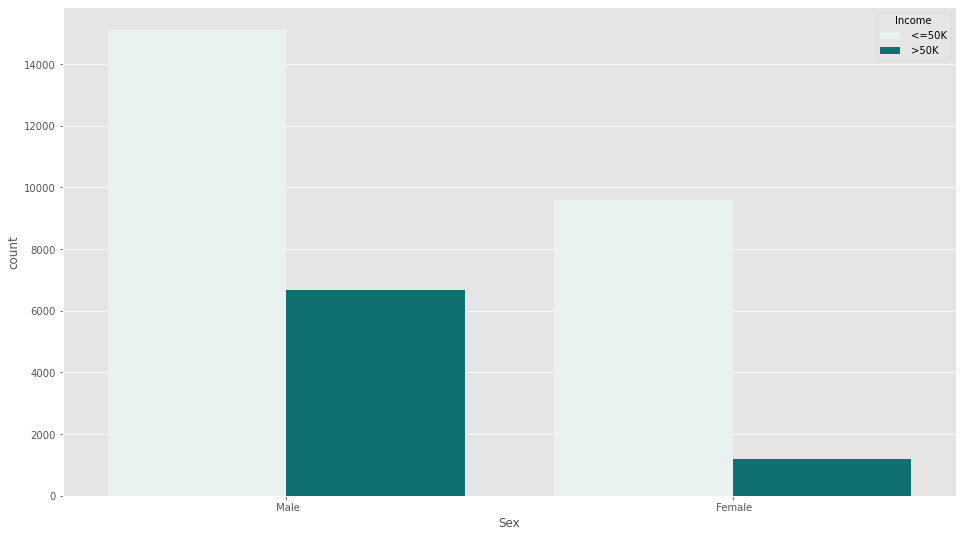

In [473]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Sex', hue = 'Income', data = cdf , color = 'teal')

From the plot above, it is clear that

There are more Male participants than Female participants
When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than \$50K than Females.

**Capital Gain and Capital Loss**<br>

Rather than having both Capital Gain and Capital Loss, we will use their difference as that is more relevant and gives the change.

In [474]:
cdf['Capital_Diff'] = cdf['Capital_Gain'] - cdf['Capital_Loss']
cdf.drop(['Capital_Gain'], axis = 1, inplace = True)
cdf.drop(['Capital_Loss'], axis = 1, inplace = True)

In [475]:
print(cdf['Capital_Diff'].min())
print(cdf['Capital_Diff'].max())

-4356
99999


Below we are creating two ranges -5000 to 5000 as Minor and 5000 to 10000 as Major.

<AxesSubplot:xlabel='Capital_Diff', ylabel='count'>

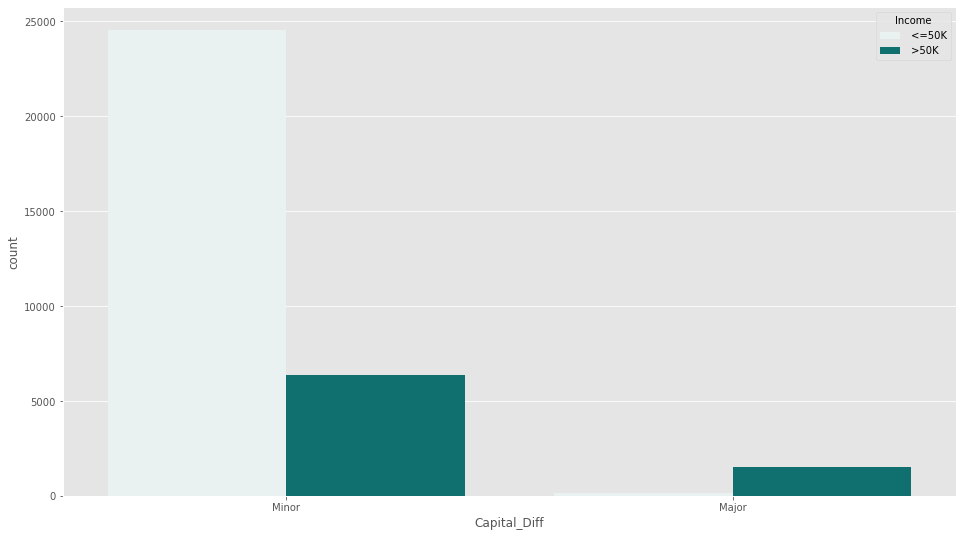

In [476]:
plt.figure(figsize = (16,9))
cdf['Capital_Diff'] = pd.cut(cdf['Capital_Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x ='Capital_Diff' , hue = 'Income', data = cdf , color = 'teal' )

From above we can observe that Minors have more Capital_Diff as compared to Majors.

**Hours per Week**<br>

 As usually, the work hours are close to 30-40 hours, We'll create the buckets as 0-30, 30-40, and 40-100

In [477]:
cdf['Hours_per_Week'] = pd.cut(cdf['Hours_per_Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser_Hours', 'Normal_Hours', 'Extr_Hours'])

<AxesSubplot:xlabel='Hours_per_Week', ylabel='count'>

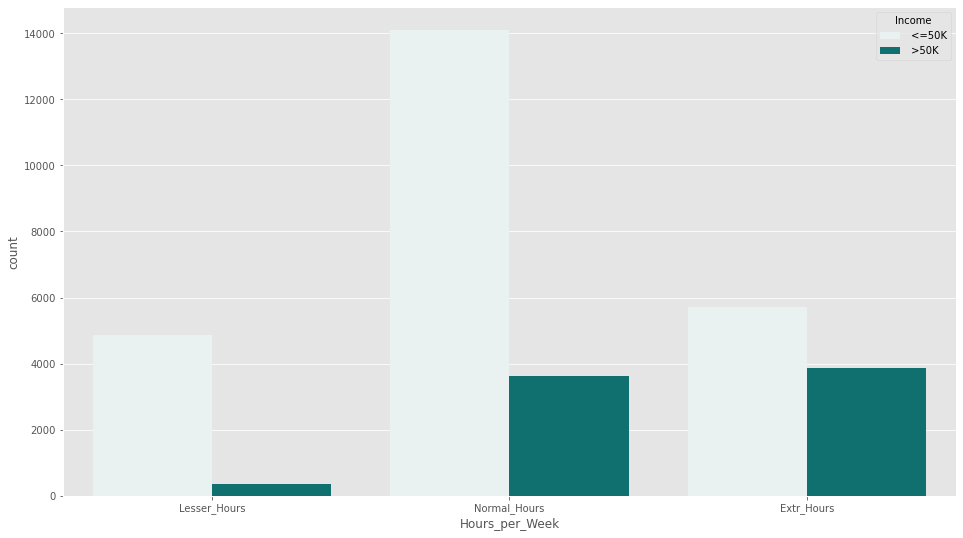

In [478]:
plt.figure(figsize= (16,9))
sns.countplot(x = 'Hours_per_Week', hue = 'Income', data = cdf , color = 'teal')

**Country**

In [479]:
cdf['Country'].value_counts()

 United-States                 29149
 Mexico                          643
 ?                               583
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [480]:
countries = np.array(cdf['Country'].unique())
countries

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Below we'll convert all the countries except United_States as Other .

In [481]:
cdf['Country'].replace([' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], 'Other'  , inplace = True)

<AxesSubplot:xlabel='count', ylabel='Country'>

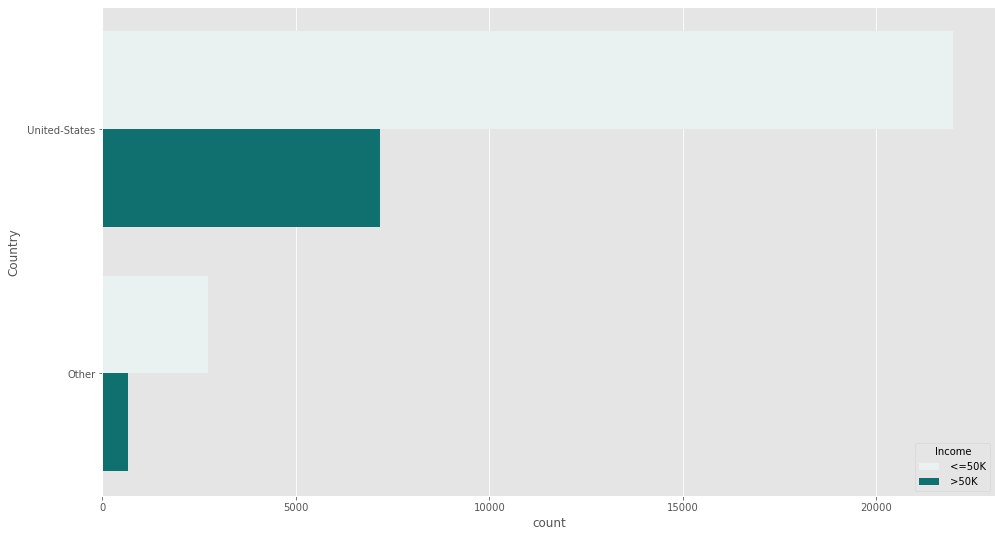

In [482]:
plt.figure(figsize = (16,9))
sns.countplot(y = 'Country', hue = 'Income', data = cdf , color = 'teal')

In [483]:
cdf.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Income,Capital_Diff
0,Adult,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser_Hours,United-States,<=50K,Minor
1,Adult,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal_Hours,United-States,<=50K,Minor
2,Old,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Normal_Hours,United-States,<=50K,Minor
3,Adult,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Normal_Hours,Other,<=50K,Minor
4,Adult,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal_Hours,United-States,<=50K,Minor


Above We have successfully filtered or datas.<br>
Now We'll use LabelEncoder to encode our object datas .

## Data Preprocessing 

### **Label Encoder**

In [484]:
def encoder(feature):
    le = LabelEncoder()
    cdf[feature] = le.fit_transform(cdf[feature])
    return cdf[feature].value_counts()

**Age**

In [485]:
encoder('Age')

0    19686
1     6452
2     6401
Name: Age, dtype: int64

**Work_Class**

In [486]:
encoder('Work_Class')

2    24532
4     2541
1     2093
5     1297
3     1116
0      960
Name: Work_Class, dtype: int64

**Education**

In [487]:
encoder('Education')

4    10491
8     7286
2     5354
7     4248
5     1723
1     1382
0     1066
6      576
3      413
Name: Education, dtype: int64

**Marital_Status**

In [488]:
encoder('Marital_Status')

2    14967
4    10673
0     4442
5     1025
6      992
3      417
1       23
Name: Marital_Status, dtype: int64

**Occupation**

In [489]:
encoder('Occupation')

9     4140
2     4098
3     4066
0     3766
11    3650
7     3294
6     2001
14    1836
13    1596
5     1369
4      988
12     928
10     649
8      149
1        9
Name: Occupation, dtype: int64

**Relationship**

In [490]:
encoder('Relationship')

0    13189
1     8303
3     5058
4     3444
5     1564
2      981
Name: Relationship, dtype: int64

**Relationship**

In [491]:
encoder('Relationship')

0    13189
1     8303
3     5058
4     3444
5     1564
2      981
Name: Relationship, dtype: int64

**Race**

In [492]:
encoder('Race')

1    27798
0     4741
Name: Race, dtype: int64

**Sex**

In [493]:
encoder('Sex')

1    21775
0    10764
Name: Sex, dtype: int64

**Capital_Difference**

In [494]:
encoder('Capital_Diff')

1    30891
0     1648
Name: Capital_Diff, dtype: int64

**Hours per Week**

In [495]:
encoder('Hours_per_Week')

2    17728
0     9577
1     5234
Name: Hours_per_Week, dtype: int64

**Country**

In [496]:
encoder('Country')

0    29149
1     3390
Name: Country, dtype: int64

**Income**

In [497]:
encoder('Income')

0    24698
1     7841
Name: Income, dtype: int64

In [498]:
cdf.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Income,Capital_Diff
0,0,4,83311,2,2,3,0,1,1,1,0,0,1
1,0,2,215646,4,0,5,1,1,1,2,0,0,1
2,1,2,234721,7,2,5,0,0,1,2,0,0,1
3,0,2,338409,2,2,9,5,0,0,2,1,0,1
4,0,2,284582,5,2,3,5,1,0,2,0,0,1


Above we have successfully encoded all our datas. Now lets move on to check for Outliers.

### **Visualising Outliers**

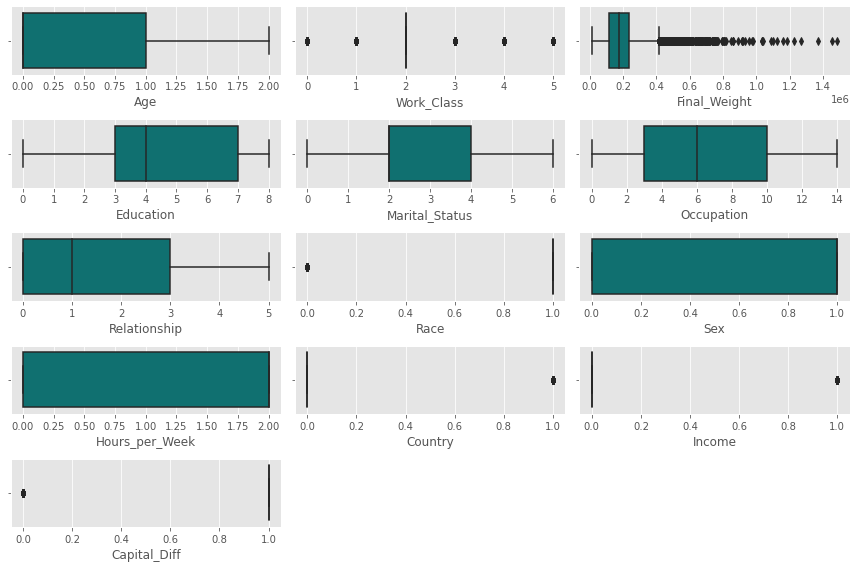

In [499]:
collist=cdf.columns.values
ncol=3
nrows=5
plt.figure(figsize=(12,8) ,tight_layout = True)
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(cdf[collist[i]], orient = 'v' , color = 'teal')
    plt.tight_layout()

From above we can observe that there are Outliers , So we will Zscore to deal with it.

In [500]:
Z_score  = np.abs(zscore(cdf))

In [501]:
cdf_wo = cdf[(Z_score<3).all(axis = 1)]

In [502]:
cdf_wo.shape

(29347, 13)

Splitting our values to **Predictor and Target Variable**.

In [503]:
x = cdf_wo.drop('Income' , axis = 1)
x

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,0,4,83311,2,2,3,0,1,1,1,0,1
1,0,2,215646,4,0,5,1,1,1,2,0,1
2,1,2,234721,7,2,5,0,0,1,2,0,1
3,0,2,338409,2,2,9,5,0,0,2,1,1
4,0,2,284582,5,2,3,5,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,2,2,310152,8,4,10,1,1,1,2,0,1
32555,0,2,257302,0,2,12,5,1,0,2,0,1
32556,0,2,154374,4,2,6,0,1,1,2,0,1
32557,1,2,151910,4,6,0,4,1,0,2,0,1


In [504]:
y = cdf_wo['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 29347, dtype: int32

### **Skewness**

In [505]:
x.skew()

Age               0.827782
Work_Class        0.665786
Final_Weight      0.628465
Education        -0.069226
Marital_Status   -0.050466
Occupation        0.140769
Relationship      0.743121
Race             -2.015913
Sex              -0.688574
Hours_per_Week   -0.528888
Country           2.555130
Capital_Diff      0.000000
dtype: float64

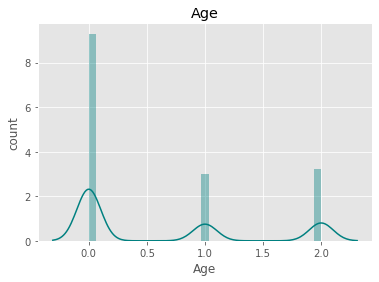

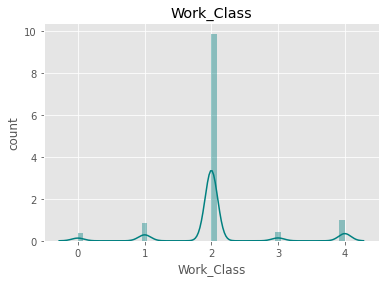

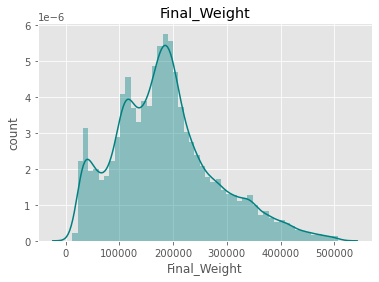

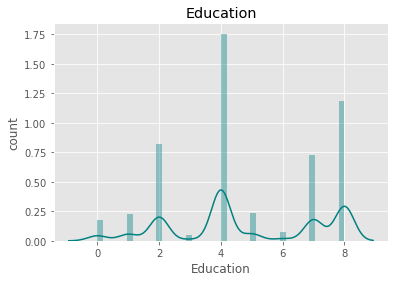

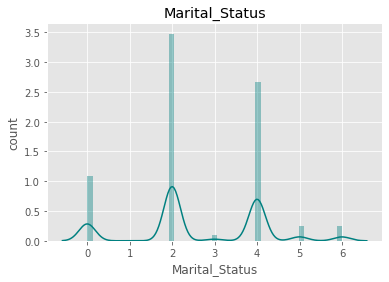

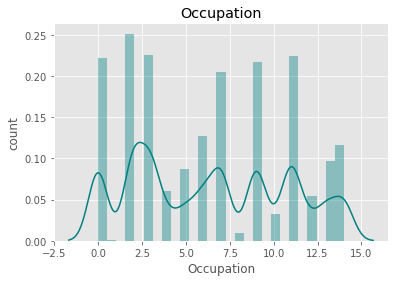

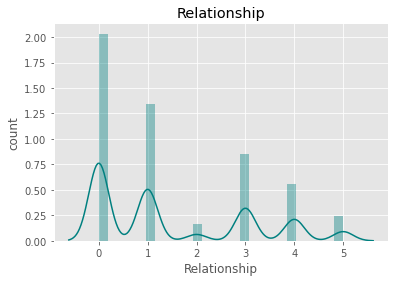

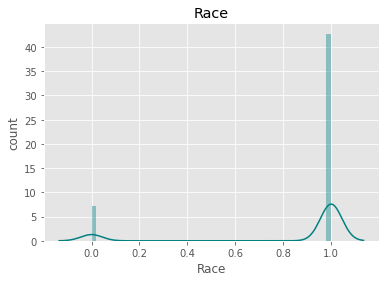

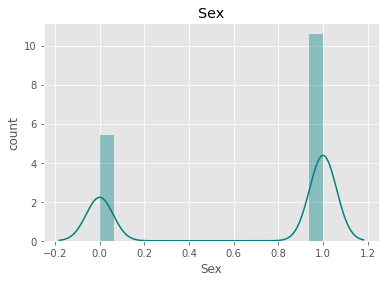

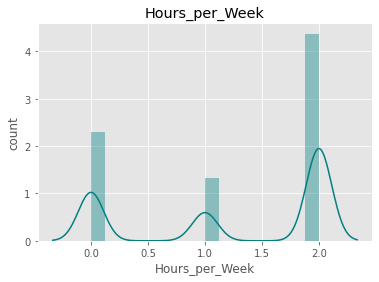

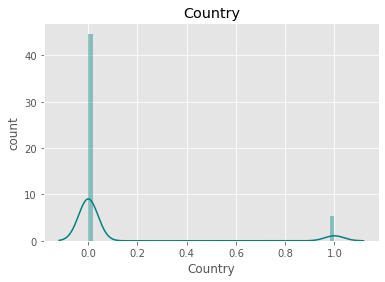

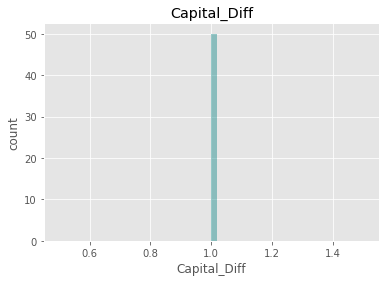

In [506]:
for feature in x :
    sns.distplot(x[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset . 

So we will use **PowerTransformer** for transforming/removing skewness from our dataset .

In [507]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x)

In [508]:
x_t

array([[-0.00000000e+00,  3.22329537e+00,  8.97919173e+02, ...,
         1.23171606e+00, -0.00000000e+00,  1.81053137e+01],
       [-0.00000000e+00,  1.74058620e+00,  1.51207890e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 4.25477738e-01,  1.74058620e+00,  1.58393664e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       ...,
       [-0.00000000e+00,  1.74058620e+00,  1.25905917e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 4.25477738e-01,  1.74058620e+00,  1.24800824e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 5.28760717e-01,  1.74058620e+00,  1.45687181e+03, ...,
         1.23171606e+00, -0.00000000e+00,  1.81053137e+01]])

In [509]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,-0.000000,3.223295,897.919173,1.844670,1.904911,2.182087,-0.000000,94.877303,2.351621,1.231716,-0.000000,18.105314
1,-0.000000,1.740586,1512.078900,3.526794,0.000000,3.256286,0.625897,94.877303,2.351621,2.847752,-0.000000,18.105314
2,0.425478,1.740586,1583.936636,5.899778,1.904911,3.256286,-0.000000,0.000000,2.351621,2.847752,-0.000000,18.105314
3,-0.000000,1.740586,1935.350855,1.844670,1.904911,5.049914,1.386416,0.000000,0.000000,2.847752,0.073719,18.105314
4,-0.000000,1.740586,1760.179839,4.333731,1.904911,2.182087,1.386416,94.877303,0.000000,2.847752,-0.000000,18.105314
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,0.528761,1.740586,1845.108452,6.663578,3.707467,5.451137,0.625897,94.877303,2.351621,2.847752,-0.000000,18.105314
29343,-0.000000,1.740586,1665.664071,0.000000,1.904911,6.213340,1.386416,94.877303,0.000000,2.847752,-0.000000,18.105314
29344,-0.000000,1.740586,1259.059170,3.526794,1.904911,3.739832,-0.000000,94.877303,2.351621,2.847752,-0.000000,18.105314
29345,0.425478,1.740586,1248.008243,3.526794,5.454761,0.000000,1.276876,94.877303,0.000000,2.847752,-0.000000,18.105314


In [510]:
x_trans.skew()

Age               0.463781
Work_Class        0.235653
Final_Weight     -0.035435
Education        -0.156926
Marital_Status   -0.126979
Occupation       -0.198926
Relationship      0.100192
Race             -2.015913
Sex              -0.688574
Hours_per_Week   -0.448593
Country           2.555130
Capital_Diff      0.000000
dtype: float64

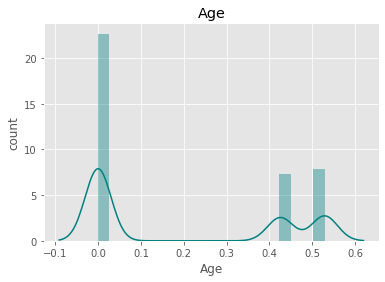

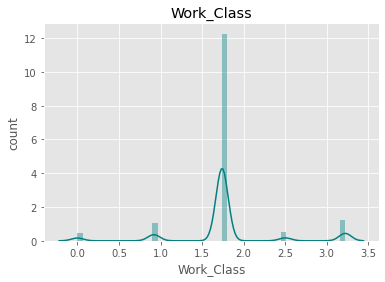

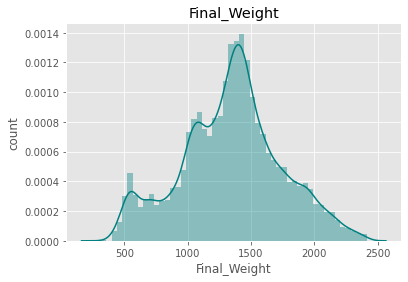

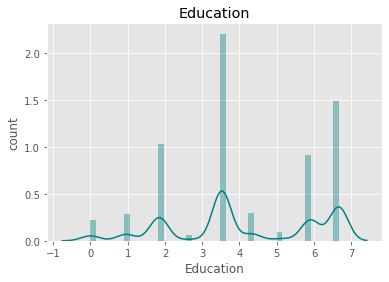

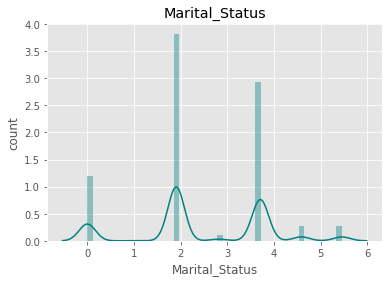

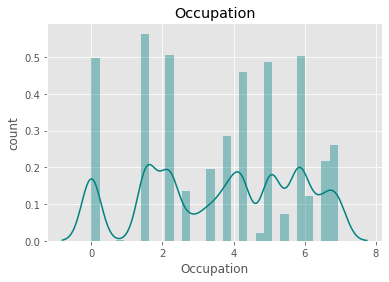

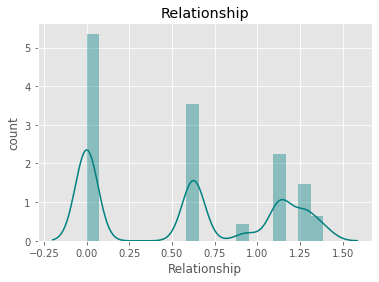

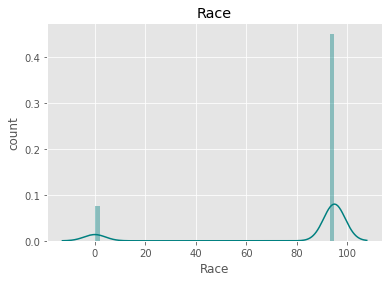

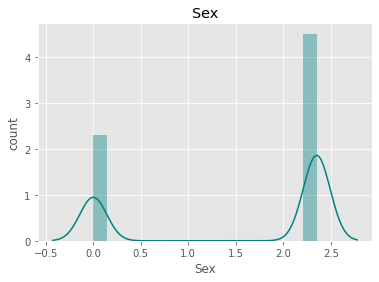

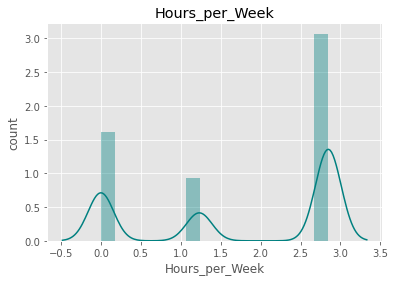

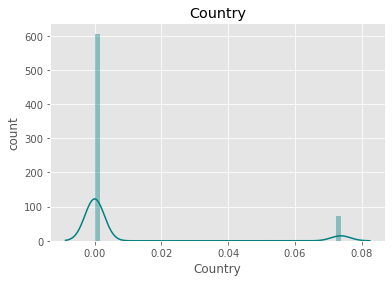

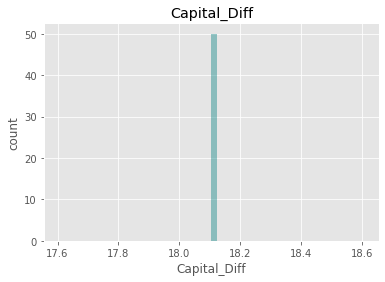

In [511]:
for feature in x :
    sns.distplot(x_trans[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we can observe that we have sucessfully removed skewness and outliers from our dataset , Now lets move on to check for skewness,

### Standard Scaling

Gaussian's distribution with zero mean and unit variance is standard scaling.

In [512]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[-0.80940221,  2.51339555, -1.11760963, ..., -0.42136855,
        -0.34484593,  0.        ],
       [-0.80940221, -0.06408003,  0.42226777, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 0.98651424, -0.06408003,  0.60243605, ...,  0.86380259,
        -0.34484593,  0.        ],
       ...,
       [-0.80940221, -0.06408003, -0.21212642, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 0.98651424, -0.06408003, -0.23983432, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 1.4224656 , -0.06408003,  0.28384751, ..., -0.42136855,
        -0.34484593,  0.        ]])

In [513]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,-0.809402,2.513396,-1.117610,-1.163230,-0.402818,-0.699446,-1.118193,0.411909,0.713332,-0.421369,-0.344846,0.0
1,-0.809402,-0.064080,0.422268,-0.306553,-1.771809,-0.194036,0.088732,0.411909,0.713332,0.863803,-0.344846,0.0
2,0.986514,-0.064080,0.602436,0.901965,-0.402818,-0.194036,-1.118193,-2.427719,0.713332,0.863803,-0.344846,0.0
3,-0.809402,-0.064080,1.483534,-1.163230,-0.402818,0.649866,1.555252,-2.427719,-1.401871,0.863803,2.899846,0.0
4,-0.809402,-0.064080,1.044329,0.104405,-0.402818,-0.699446,1.555252,0.411909,-1.401871,0.863803,-0.344846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,1.422466,-0.064080,1.257270,1.290955,0.892613,0.838641,0.088732,0.411909,0.713332,0.863803,-0.344846,0.0
29343,-0.809402,-0.064080,0.807351,-2.102687,-0.402818,1.197258,1.555252,0.411909,-1.401871,0.863803,-0.344846,0.0
29344,-0.809402,-0.064080,-0.212126,-0.306553,-0.402818,0.033473,-1.118193,0.411909,0.713332,0.863803,-0.344846,0.0
29345,0.986514,-0.064080,-0.239834,-0.306553,2.148329,-1.726119,1.344023,0.411909,-1.401871,0.863803,-0.344846,0.0


### Correlation Heatmap

<AxesSubplot:>

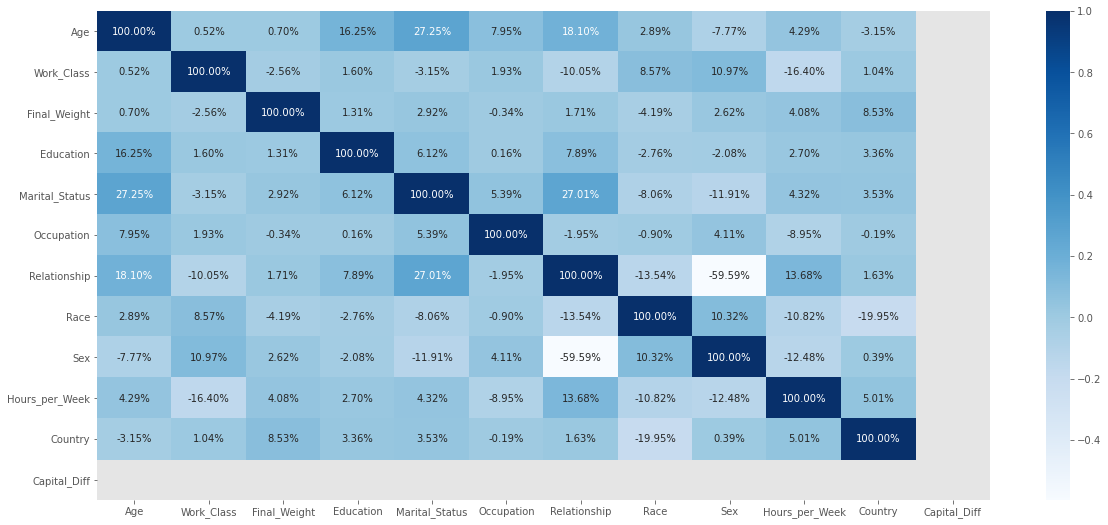

In [514]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')

From above we can observe that our predictor variables are not very much correlated with each other , so we will not require PCA for this.

**Importance Bar Graph**

This graph shows the importance of each feature in predicting target variable .

In [569]:
importances = pd.DataFrame({'feature':x_sc.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Final_Weight,0.415
Occupation,0.117
Relationship,0.111
Education,0.109
Marital_Status,0.065
Work_Class,0.052
Age,0.047
Hours_per_Week,0.044
Sex,0.014


<AxesSubplot:xlabel='feature'>

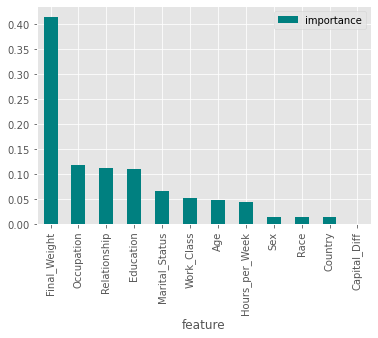

In [570]:
importances.plot.bar(color = 'teal')

## Machine Learning Models

In [518]:
#  X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=42)

In [519]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

## Finding Best Random State

In [520]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8293015332197615 on random state  191


Below we'll apply different classifier algorithms to find the best model for our further predictions.

In [521]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.8065426930191802
Accuracy: 0.7979557069846678
Confusion Matrix:
 [[6738 1566]
 [ 213  288]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8304
           1       0.16      0.57      0.24       501

    accuracy                           0.80      8805
   macro avg       0.56      0.69      0.56      8805
weighted avg       0.92      0.80      0.85      8805

K Nearest Neighbor  -  0.8671989095511635
Accuracy: 0.8218057921635434
Confusion Matrix:
 [[6354  972]
 [ 597  882]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7326
           1       0.48      0.60      0.53      1479

    accuracy                           0.82      8805
   macro avg       0.69      0.73      0.71      8805
weighted avg 

**Accuracy Plot**

Plotting Accuracies of different Algorithms to find the perfect one for our model.

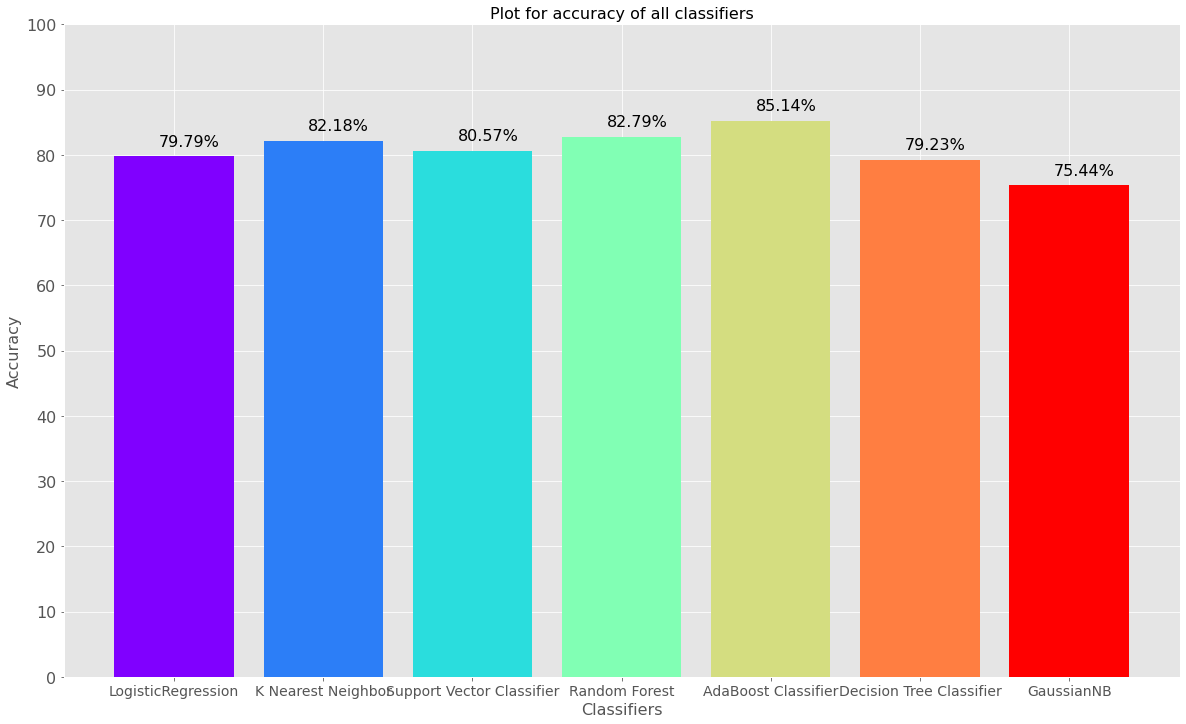

In [533]:

accuracies  = [79.79 , 82.18 , 80.57 , 82.79 , 85.14 , 79.23 , 75.44]

plt.figure(figsize = (20,12))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(x = names , height = accuracies , color = colors ,tick_label = names)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks( fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

From above we can observe that AdaBoostClassifier has the best accuracy and confusion_matrix scores.<br>
So we'll use AdaBoostClassifier for our future predictions. 

### Training AdaBoostClassifier again

**Finding Best Random State**

In [534]:
maxAccu=0
maxRS=0
for i in range(0,50):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    ab=AdaBoostClassifier()
    ab.fit(X_train,y_train)
    predab=ab.predict(X_test)
    acc=accuracy_score(y_test,predab)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.852015900056786 on random state  19


In [541]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=19)

adaboost_classifier = AdaBoostClassifier(n_estimators= 200,)
adaboost_classifier.fit(X_train, y_train)
y_prediction = adaboost_classifier.predict(X_test)
adaboost_classifier.score(X_train, y_train)
acc_adaboost_classifier = round(adaboost_classifier.score(X_train, y_train) * 100, 2)
print(round(acc_adaboost_classifier,2,), "%")

84.58 %


#### Hyperparameter tuning of AdaBoost Classifier 

In [542]:
param_grid = {'learning_rate':[0.001, 0.10, 0.1, 1]  ,  'n_estimators':range(50, 200, 50)}


ab = AdaBoostClassifier( random_state = 19)


grid_ab = GridSearchCV(ab , param_grid, scoring = 'accuracy')
grid_ab.fit(X_train, y_train)

print("Best Hyper Parameters:\n",grid_ab.best_params_)
print("training accuracy:\n",grid_ab.best_score_)
ab_grid_pred = grid_ab.best_estimator_.predict(X_test)

print("Accuracy:",accuracy_score(ab_grid_pred , y_test))

print("Confusion Matrix:\n",confusion_matrix(ab_grid_pred , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(ab_grid_pred , y_test))


Best Hyper Parameters:
 {'learning_rate': 1, 'n_estimators': 300}
training accuracy:
 0.8460231453363234
Accuracy: 0.8525837592277116
Confusion Matrix:
 [[6565  861]
 [ 437  942]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7426
           1       0.52      0.68      0.59      1379

    accuracy                           0.85      8805
   macro avg       0.73      0.78      0.75      8805
weighted avg       0.87      0.85      0.86      8805



**Confusion Matrix**

In [543]:
predictions = cross_val_predict(grid_ab, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[15276,  1074],
       [ 2131,  2061]], dtype=int64)

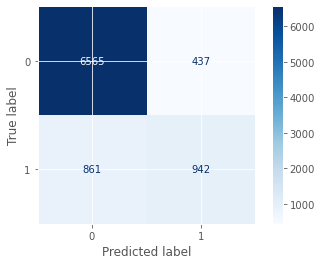

In [546]:
plot_confusion_matrix( grid_ab ,X_test , y_test , cmap = 'Blues' )

#### PLotting y_test and y_predicted for our datset . 

>1, train: 0.796, test: 0.795
>2, train: 0.796, test: 0.795
>3, train: 0.796, test: 0.795
>4, train: 0.818, test: 0.816
>5, train: 0.813, test: 0.813
>6, train: 0.819, test: 0.816
>7, train: 0.822, test: 0.828
>8, train: 0.821, test: 0.820
>9, train: 0.830, test: 0.838
>10, train: 0.830, test: 0.838
>11, train: 0.831, test: 0.835
>12, train: 0.830, test: 0.838
>13, train: 0.831, test: 0.838
>14, train: 0.839, test: 0.848
>15, train: 0.840, test: 0.843
>16, train: 0.841, test: 0.849
>17, train: 0.839, test: 0.848
>18, train: 0.837, test: 0.847
>19, train: 0.838, test: 0.847
>20, train: 0.840, test: 0.848


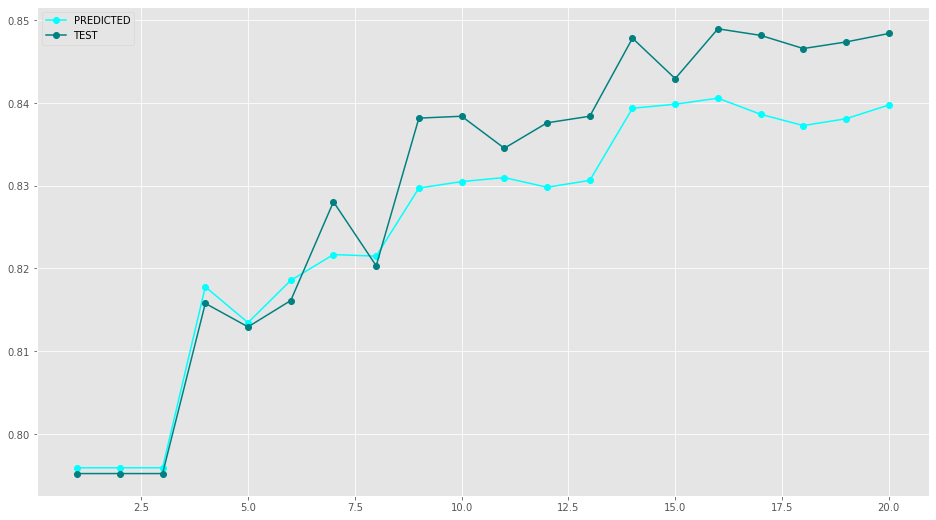

In [553]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:

    model = AdaBoostClassifier(n_estimators=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED' , color = 'aqua')
plt.plot(values, test_scores, '-o', label='TEST' , color = 'teal')
plt.legend()
plt.show()

#### ROC Curve

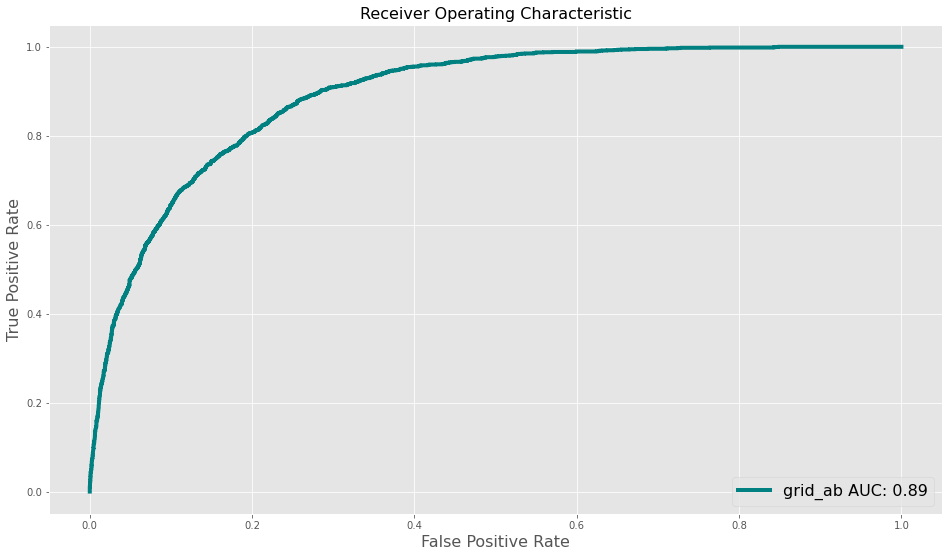

In [565]:
probs = grid_ab.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
label = 'grid_ab' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.figure(figsize=(16,9)) 
plt.plot(fpr, tpr,label = label , linewidth = 4 ,color = 'teal')
   
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [566]:
import joblib
joblib.dump(grid_ab , 'AdaBoostClassifier.pkl')

['AdaBoostClassifier.pkl']